## Import Dependencies

In [1]:
# Import Matplotlib Style
from matplotlib import style
style.use('fivethirtyeight')

# Add the pyplot module, a dependency that provides us with a MATLAB-like plotting framework. 
import matplotlib.pyplot as plt


# Import Numpy & Pandas Dependencies
import numpy as np
import pandas as pd


# Import Datetime Dependencies
import datetime as dt

# Import SQLALchemy Dependencies
# Also add the dependencies for automap, session, create_engine, and func. 
# These dependencies will help us set up a simple database that we’ll use later on.
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

####  SQLALchemy Create Engine

In [2]:
# This function(SQLALchemy Create Engine ()) just prepares the database file to be connected to later on.

engine = create_engine("sqlite:///hawaii.sqlite")

#### SQLAlchemy Automap Base

In [3]:
# This function(SQLALchemy Automap Base ()) reflects a database into a new model,
# essentially means to transfer the contents of the database into a different structure of data.
# Basically, it sets up a foundation for us to build on in SQLAlchemy, and by adding it to our code,
# it will help the rest of our code to function properly.

Base = automap_base()

#### SQLAlchemy Reflect Tables

In [4]:
# Reflecting our database tables into our cod with the prepare() function

Base.prepare(engine, reflect = True)

#### View Classes Found by Automap

In [5]:
# To double-check that Automap was able to find all of the data in the SQLite database we use the Base.classes.keys()  
# Base.classes gives us access to all the classes.
# keys() references all the names of the classes.

Base.classes.keys()   

['measurement', 'station']

#### Save References to Each Table

In [6]:
# In order to reference a specific class, we use Base.classes.<class name>. 
# eg. Base.classes.station ref the class station
# We can create new references for our classes so that we don't have to repeat Base.classes.<class name> everytime like so:

Measurement = Base.classes.measurement
Station = Base.classes.station

#### Create Session Link to the Database

In [7]:
# Use a SQLAlchemy Session to query our database/data

session = Session(engine)


### Retrieve the Precipitation Data

In [8]:
# Find the Date One Year Ago by adding the dt.timedelta() function to first code

prev_year = dt.date(2017, 8, 23)

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [10]:
# Retrieve the amount of precipitation that was recorded, or the precipitation score for 8/23/2016.
# Create a variable "results = []" to store the results of the quer. Use the session.query() function, 
# which is how we’ll begin all of our queries in SQLAlchemy. This is also how we query a SQLite database using Python.
# Session.query() function for this query will take two parameters.Reference the Measurement table using Measurement.date and Measurement.prcp.

results = session.query(Measurement.date, Measurement.prcp)
print(results.all())

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [15]:
# Use the filter() function to filter out all the data that is older than a year from last record date
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

# Now add a function that extracts all of the results from our query and put them in a list; by adding a .all() to end of above query

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 


### Save Query Results

In [18]:
# Save query results 'above' to a Python Pandas DF. Start by creating a DataFrame variable, df
# To save our results as a DF, provide our results variable as one parameter and specify the column names as our second parameter.
# Results are saved in 2 columns, date & precipitation

df = pd.DataFrame(results, columns = ['date', 'precipitation'])
print(df)

            date  precipitation
0     2016-08-23           0.00
1     2016-08-24           0.08
2     2016-08-25           0.08
3     2016-08-26           0.00
4     2016-08-27           0.00
...          ...            ...
2225  2017-08-19           0.09
2226  2017-08-20            NaN
2227  2017-08-21           0.56
2228  2017-08-22           0.50
2229  2017-08-23           0.45

[2230 rows x 2 columns]


In [17]:
# Use the set_index() function to manipulate the DF, in this case to set the date column as the index column
# Use the 'inplace = True' variable to specify DO NOT want to overwrite the previous DF. Inplace = False means overwrite

df.set_index(df['date'], inplace = True)
print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [19]:
# Use a slightly different print statement to print the DF without the date as index,so we can see just the date & prcp

print(df.to_string(index = False))

       date  precipitation
 2016-08-23           0.00
 2016-08-24           0.08
 2016-08-25           0.08
 2016-08-26           0.00
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 


###  Sort the DataFrame

In [21]:
# Sort the prcp values by date using the sort_index() function

df = df.sort_index()

# Code to print the sorted list without the index?
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-24           0.08
 2016-08-25           0.08
 2016-08-26           0.00
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 

### Plot the Data

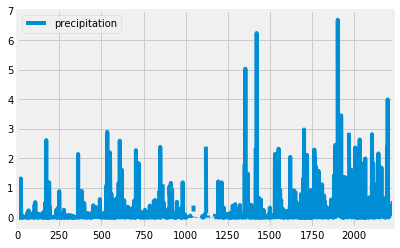

In [22]:
#  Display data in a visual way using the df.plot function(). Note our DF has variable name df

df.plot()


###  Generate the Summary

In [23]:
# Use the describe() function on the DF, to calculate the mean, minimum, maximum, standard deviation, and percentiles.

df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000
